In [27]:
import json
import pandas as pd
try:
    %matplotlib inline
except Exception as e:
    pass

import warnings
warnings.filterwarnings("ignore")
import util
with open('./data-trunc2.json') as fp:
    # 500ms~
    data:dict = util.partial_json(fp,objs=100)
    # data:dict = json.load(fp)
    
    

In [28]:
data

{'1577836803078': {'assetA': {'ask': 7189, 'bid': 7188.89},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806371': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806459': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806474': {'assetA': {'ask': 7190.43, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806575': {'assetA': {'ask': 7190.39, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807242': {'assetA': {'ask': 7190.33, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807344': {'assetA': {'ask': 7190.25, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807444': {'assetA': {'ask': 7190.21, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807545': {'assetA': {'ask': 7190.12, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807649': {'assetA': 

In [29]:
df = pd.DataFrame.from_dict(data,orient='index')

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
1577836827732,"{'ask': 7186.72, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836827941,"{'ask': 7186.7, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836828147,"{'ask': 7186.69, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"
1577836828247,"{'ask': 7186.68, 'bid': 7186.31}","{'ask': 7169.75, 'bid': 7169.5}"


In [30]:
def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

In [31]:
assetA:pd.DataFrame = df.assetA.apply([asks, bids])

,asks,bids
1577836803078,7189.00,7188.89
1577836806371,7190.09,7190.05
1577836806459,7190.09,7190.05
1577836806474,7190.43,7190.05
1577836806575,7190.39,7190.05
...,...,...
1577836827732,7186.72,7186.31
1577836827941,7186.70,7186.31
1577836828147,7186.69,7186.31
1577836828247,7186.68,7186.31


In [32]:
print('assetA.asks.mean():',assetA.asks.mean())
print('assetA.bids.mean():',assetA.bids.mean())

assetA.asks.mean(): 7188.2779
assetA.bids.mean(): 7187.591700000002


In [33]:
assetB = df.assetB.apply([asks, bids])

,asks,bids
1577836803078,7170.25,7169.5
1577836806371,7170.25,7169.5
1577836806459,7170.50,7169.5
1577836806474,7170.50,7169.5
1577836806575,7170.50,7169.5
...,...,...
1577836827732,7169.75,7169.5
1577836827941,7169.75,7169.5
1577836828147,7169.75,7169.5
1577836828247,7169.75,7169.5


In [34]:
print('assetB.asks.mean():',assetB.asks.mean())
print('assetB.bids.mean():',assetB.bids.mean())

assetB.asks.mean(): 7169.94
assetB.bids.mean(): 7169.5


In [35]:
# short term exponential moving average
short_ema = assetA.ewm(span=12,adjust=False).mean()


,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.167692,7189.068462
1577836806459,7189.309586,7189.219467
1577836806474,7189.481957,7189.347242
1577836806575,7189.621656,7189.455358
...,...,...
1577836827732,7186.909673,7186.311020
1577836827941,7186.877415,7186.310863
1577836828147,7186.848582,7186.310730
1577836828247,7186.822647,7186.310618


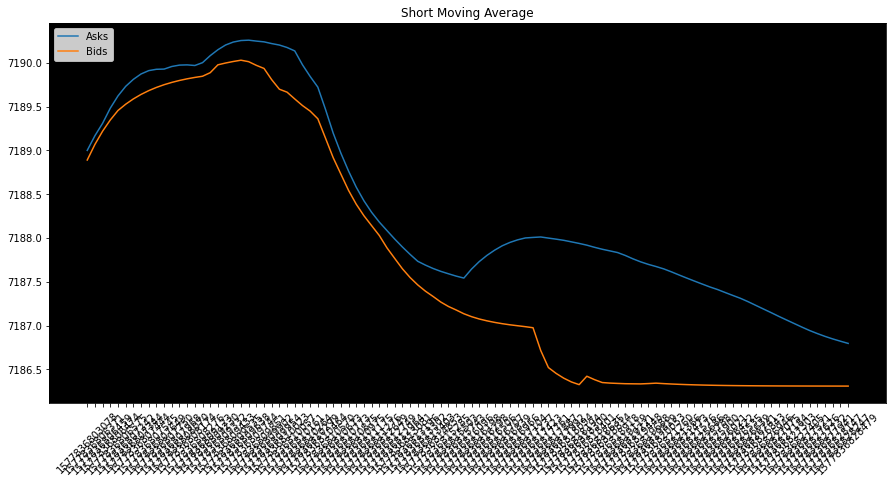

In [39]:
util.plot(short_ema, title= 'Short Moving Average')

In [37]:
# long term exponential moving average
long_ema = assetA.ewm(span=26,adjust=False).mean()

,asks,bids
1577836803078,7189.000000,7188.890000
1577836806371,7189.080741,7188.975926
1577836806459,7189.155501,7189.055487
1577836806474,7189.249908,7189.129155
1577836806575,7189.334359,7189.197365
...,...,...
1577836827732,7187.148805,7186.358882
1577836827941,7187.115560,7186.355261
1577836828147,7187.084037,7186.351908
1577836828247,7187.054108,7186.348804


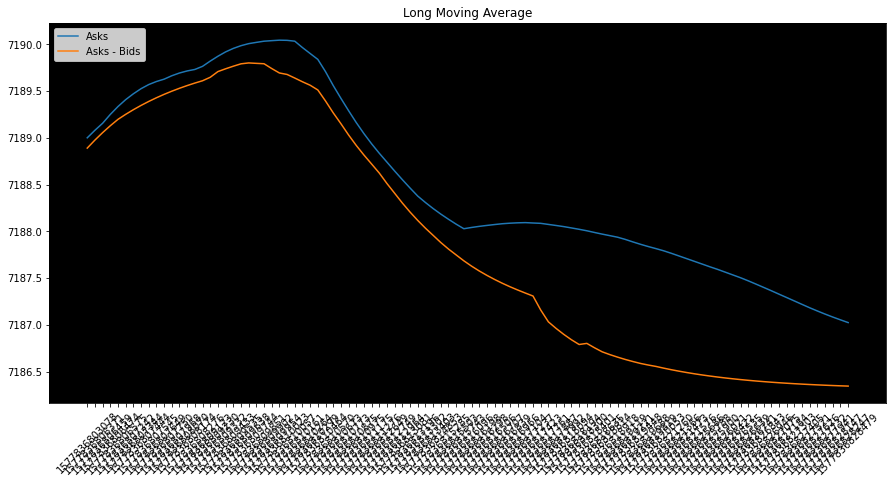

In [38]:
util.plot(long_ema,title='Long Moving Average')

In [14]:
#Moving Average Convergence Divergence
macd = short_ema - long_ema

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.086952,0.092536
1577836806459,0.154085,0.163980
1577836806474,0.232049,0.218087
1577836806575,0.287297,0.257993
...,...,...
1577836827732,-0.239132,-0.047862
1577836827941,-0.238144,-0.044398
1577836828147,-0.235455,-0.041178
1577836828247,-0.231462,-0.038186


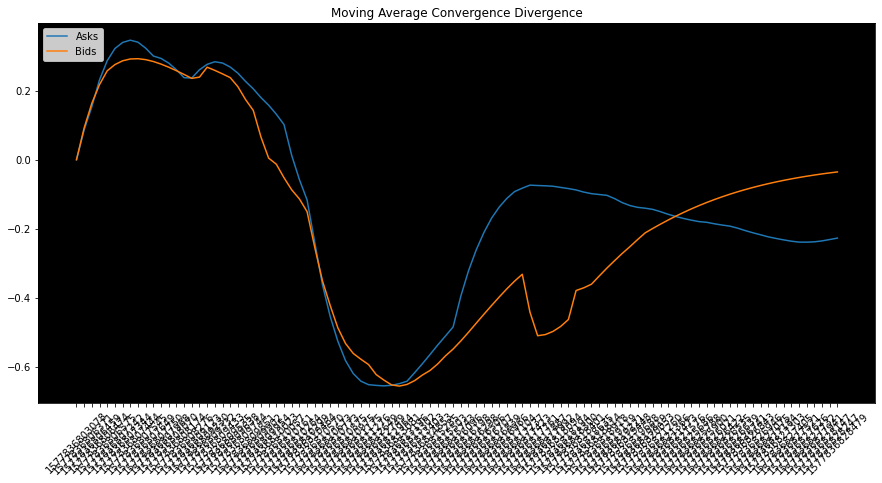

In [15]:
util.plot(macd, title = 'Moving Average Convergence Divergence')

In [16]:
# signal line
signal = macd.ewm(span=9, adjust=False).mean()

,asks,bids
1577836803078,0.000000,0.000000
1577836806371,0.017390,0.018507
1577836806459,0.044729,0.047602
1577836806474,0.082193,0.081699
1577836806575,0.123214,0.116958
...,...,...
1577836827732,-0.224903,-0.068631
1577836827941,-0.227552,-0.063785
1577836828147,-0.229132,-0.059263
1577836828247,-0.229598,-0.055048


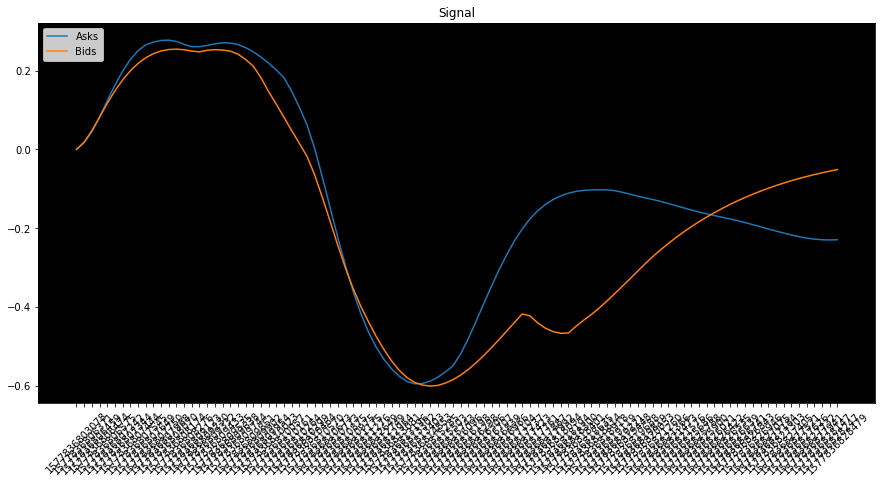

In [17]:
util.plot(signal, title = 'Signal')

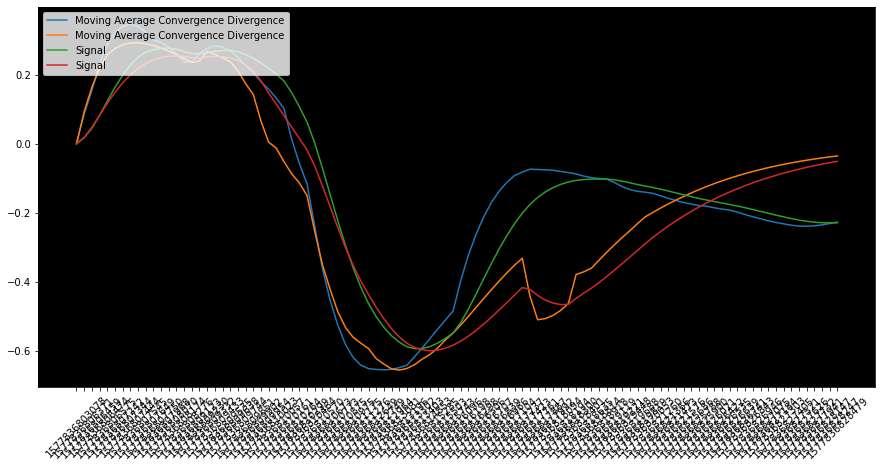

In [20]:
# plot
util.plotmany(df.index,[
    (macd, dict(label = 'Moving Average Convergence Divergence')),
    (signal, dict(label = 'Signal'))
    ], title = 'MACD vs Signal')

False